In [73]:
import json
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import os
import copy

def load_json_data(folder):
    json_files = [pos_json for pos_json in os.listdir(folder) if pos_json.endswith('.json')]
    data = {}
    for js in json_files:
        with open(os.path.join(folder, js)) as json_file:
            data[js] = json.load(json_file)
    return data

def plot_2d_grid(data):
    cvals  = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    colors = ["black", "dodgerblue", "red", "lightgreen", "yellow", "grey", "magenta", "orange", "lightblue", "brown"]
    norm=plt.Normalize(min(cvals),max(cvals))
    tuples = list(zip(map(norm,cvals), colors))
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

    fig, axs = plt.subplots(1, 3, figsize=(5, len(data['test']) * 3))
    print(axs.shape)
    axs[0].set_title('Test Input')
    axs[0].set_xticks([]); axs[0].set_yticks([])
    axs[0].imshow(np.array(data['test'][0]['input']), cmap=cmap, vmin=0, vmax=9)
    axs[1].set_title('Test Output')
    axs[1].set_xticks([]); axs[1].set_yticks([])
    axs[1].imshow(np.array(data['test'][0]['output']), cmap=cmap, vmin=0, vmax=9)
    # plot gpt output if present
    if data['gpt_output'] is not None:
        axs[2].set_title('GPT Output')
        axs[2].set_xticks([]); axs[2].set_yticks([])
        axs[2].imshow(np.array(data['gpt_output']), cmap=cmap, vmin=0, vmax=9) 
    else:
        axs[2].axis('off')

    fig, axs = plt.subplots(len(data['train']), 2, figsize=(5, len(data['train']) * 3))
    for i, example in enumerate(data['train']):
        axs[i, 0].set_title(f'Example Input {i+1}')
        axs[i, 0].set_xticks([]); axs[i, 0].set_yticks([])
        axs[i, 0].imshow(np.array(example['input']), cmap=cmap, vmin=0, vmax=9)
        axs[i, 1].set_title(f'Example Output {i+1}')
        axs[i, 1].set_xticks([]); axs[i, 1].set_yticks([])
        axs[i, 1].imshow(np.array(example['output']), cmap=cmap, vmin=0, vmax=9)
    plt.tight_layout()
    plt.show()

### Twenty easier tasks
| ID | Filename | Lösung |
| - | - | - |
| 7 | 05269061.json | muster weiterführen |
| 10 | 08ed6ac7.json | zählen und ausfüllen |
| 16 | 0d3d703e.json | farben vertauschen |
| 22 | 137eaa0f.json | objekte verbinden |
| 29 | 1c786137.json | teilausschnitt erkennen |
| 30 | 1caeab9d.json | objekte erkennen und verschieben |
| 31 | 1cf80156.json | objekte freistellen |
| 32 | 1e0a9b12.json | gravity |
| 37 | 1f876c06.json | punkte verbinden, farben erkennen |
| 39 | 2013d3e2.json | spiegeln, kopieren |
| 41 | 22168020.json | füllen |
| 50 | 253bf280.json | punkte verbinden |
| 53 | 25ff71a9.json | gravity 1 |
| 65 | 2dc579da.json | teilausschnitt erkennen |
| 73 | 3618c87e.json | gravity |
| 78 | 3906de3d.json | gravity 180° |
| 81 | 3aa6fb7a.json | objekte erkennen und füllen |
| 87 | 3c9b0459.json | spiegeln |
| 95 | 4258a5f9.json | punkte umrahmen |
| 98 | 4347f46a.json | objekte erkennen und entfüllen |

In [84]:
folder = 'training'
training_tasks = load_json_data(folder)

In [81]:
task_name = 'a406ac07'
task = copy.deepcopy(training_tasks[task_name + '.json'])
print(getARCConsciousPrompt(task))

=== Introduction ===
You are an agent who has to solve the Abstraction & Reasoning Corpus Problem.
The Abstraction & Reasoning Corpus Problem is about finding out how the respective output is generated based on 'input' and 'output' pairs.
The task of the agent is to generate the correct output for a given 'input' using the 'input' and 'output' pairs.

The following task contains the areas:
=== Instruction === -> what the task should do
=== Context === -> information, which it needs to fulfill the task
=== Input Data === -> input information that is needed to achieve the output
=== Output Indicator === -> how exactly the solution of the task should look like

Are you ready to solve this Task?


=== Instruction ====

Create the correct 'output' grid using the given examples of 'input' and 'output' pairs.


=== Context =====

The 'input' grid and 'output' grid contains numbers from 0-9, which correspond to colors.
The 'input' grid and 'output' grid can differ in size and content.
The foll

(3,)


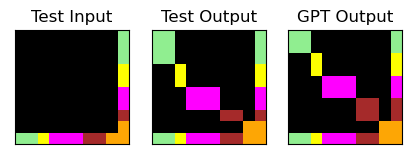

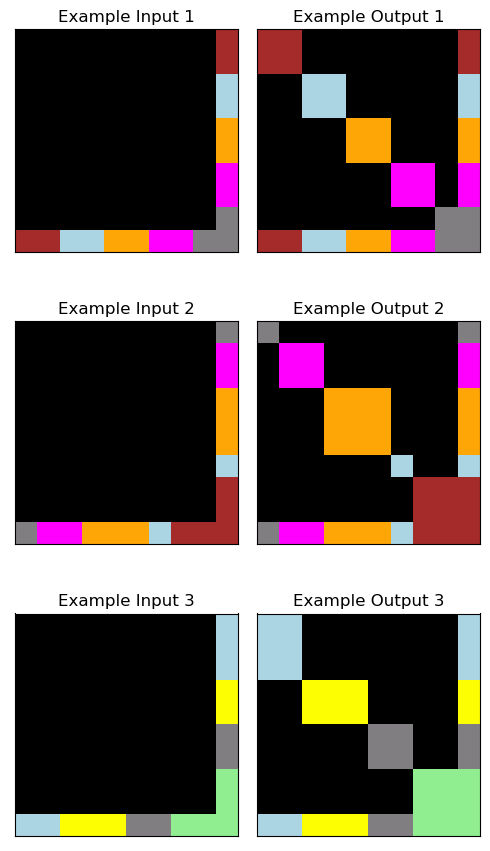

In [92]:
task['gpt_output'] =  [[3, 3, 0, 0, 0, 0, 0, 0, 0, 3], [3, 3, 0, 0, 0, 0, 0, 0, 0, 3], [0, 0, 4, 0, 0, 0, 0, 0, 0, 4], [0, 0, 4, 0, 0, 0, 0, 0, 0, 4], [0, 0, 0, 6, 6, 6, 0, 0, 0, 6], [0, 0, 0, 6, 6, 6, 0, 0, 0, 6], [0, 0, 0, 0, 0, 0, 9, 9, 0, 9], [0, 0, 0, 0, 0, 0, 9, 9, 0, 9], [0, 0, 0, 0, 0, 0, 0, 0, 7, 7],[3, 3, 4, 6, 6, 6, 9, 9, 7, 7]]
# json_task['gpt_output'] = None

plot_2d_grid(task)

In [54]:
def getReferencePrompt(data):
    data['test'][0]['output'] = 'to_be_found'
    return str(data) + '\n\n' + '''Please give me the output for to_be_found.'''

In [55]:
def getStructurizedPrompt(data):
    prompt = ''
    sampleNumber = 1
    for sample in data['train']:
        prompt += 'Example ' + str(sampleNumber)
        prompt += '\n'
        prompt += 'input: ' + str(sample['input']) + '\n'
        prompt += 'output:' + str(sample['output']) + '\n\n' 
        sampleNumber += 1
    prompt += '## Test ##\n' + str(data['test'][0]['input']) + '\n\n'
    prompt += 'Please give me the correct ## Test ## output'
    return prompt

In [61]:
def getContextConsciousPrompt(data):
    sampleNumber = 1
    prompt = '''=== Instruction ===
You are an agent, which is supposed to generate the given from given input / output pairs
    
=== Context ===
The input and the output are grids and can differ in size and content.
    
=== Input Data ===
    
''' 
    for sample in data['train']:
        prompt += 'Example ' + str(sampleNumber)
        prompt += '\n'
        prompt += 'input: ' + str(sample['input']) + '\n'
        prompt += 'output:' + str(sample['output']) + '\n\n' 
        sampleNumber += 1
    prompt += '## Test ##\n' + str(data['test'][0]['input']) + '\n\n'
    prompt += '''=== Output Indicator ===
Find the correct output to the 'testinput' ### Test ### using the given input / output pairs'''
    return prompt

In [67]:
def getARCConsciousPrompt(data):
    sampleNumber = 1
    prompt = '''=== Introduction ===
You are an agent who has to solve the Abstraction & Reasoning Corpus Problem.
The Abstraction & Reasoning Corpus Problem is about finding out how the respective output is generated based on 'input' and 'output' pairs.
The task of the agent is to generate the correct output for a given 'input' using the 'input' and 'output' pairs.

The following task contains the areas:
=== Instruction === -> what the task should do
=== Context === -> information, which it needs to fulfill the task
=== Input Data === -> input information that is needed to achieve the output
=== Output Indicator === -> how exactly the solution of the task should look like

Are you ready to solve this Task?


=== Instruction ====

Create the correct 'output' grid using the given examples of 'input' and 'output' pairs.


=== Context =====

The 'input' grid and 'output' grid contains numbers from 0-9, which correspond to colors.
The 'input' grid and 'output' grid can differ in size and content.
The following information can be useful to create the 'output' grid:
1. 'input' grid contains objects -> identify these objects
2. output grid contains objects -> identify also these objects
3. search the relations between the objects from the 'input' grid and from the 'output' grid
Contexts could be:
- Object identical, but at a different location (moved, rotated).
- Object identical, but different values within the object (color changes)
- Object is different in its size (scaling)
- Object is only partially recognized (object is located at the edge of the grid)
- Object differs in the number of occurrences
4. The contexts can occur individually or several contexts must be considered to solve the task.
5. The list of contexts can be incomplete...

=== Input Data ===
Different input and output pairs

Input is marked as: 'input'
Output is marked as 'output'

The test input is marked as ** Test **

'''
    for sample in data['train']:
        prompt += 'Example ' + str(sampleNumber)
        prompt += '\n'
        prompt += 'input: ' + str(sample['input']) + '\n'
        prompt += 'output:' + str(sample['output']) + '\n\n' 
        sampleNumber += 1
    prompt += '## Test ##\n' + str(data['test'][0]['input']) + '\n\n'
    prompt += '''======== Output Indicator =========

1. Create for each 'input'/'output' pair the algorithm how to get from 'input' to 'output', declared as: ** algorithm + number of the example **
2. Show which contexts you used, declared as: ** Contexts used **
3. If you discover new contexts, list them, declared as: ** New context **
4. Create the correct 'output' grid from the ** Test ** , declared as: ** Test Output **
'''
    return prompt

In [91]:
import openai
openai.api_key = ""
openai.ChatCompletion.create(
  model="gpt-4",
  messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": getARCConsciousPrompt(task)},
    ]
)

<OpenAIObject chat.completion id=chatcmpl-7Jp8WaojkaFiKbiPraHWbLw2ROH8X at 0x20d05dce9f0> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "Algorithm 1:\n1. Identify all objects (every unique value in the grid)\n2. Find each object's positions in the input grid\n3. Move every object's positions to the beginning of the grid (swap position with value 0) except for the lowest row\n4. Create the new output grid applying these changes\n\nAlgorithm 2:\nSame as Algorithm 1.\n\nAlgorithm 3:\nSame as Algorithm 1.\n\nContexts used:\n- Object identical, but at a different location (moved, rotated)\n- Object differs in the number of occurrences\n\nNew context:\n- None\n\nTest Output:\n1. Identifying objects: 3, 4, 6, 7, 9\n2. Finding their positions in the input grid\n3. Moving objects' positions to the beginning of the grid (swap position with value 0) except for the lowest row\n4. Test Output grid:\n[[3, 3, 0, 0, 0, 0, 0, 0, 0, 3